# Preprocessing & EDA on Books

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

books = pd.read_csv('../data_raw/BX-Books.csv')
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...
1,1551103982,The Cycling Adventures of Coconut Head: A Nort...,Ted Schredd,1900,Graphic Arts Center Pub Co,http://images.amazon.com/images/P/1551103982.0...,http://images.amazon.com/images/P/1551103982.0...,http://images.amazon.com/images/P/1551103982.0...
2,013022393X,All the Best Salads and Salad Dressings,J. Warner,1911,Prentice Hall Direct,http://images.amazon.com/images/P/013022393X.0...,http://images.amazon.com/images/P/013022393X.0...,http://images.amazon.com/images/P/013022393X.0...
3,030758013X,Assorted Small Tray Puzzles,Golden,1920,Golden Books,http://images.amazon.com/images/P/030758013X.0...,http://images.amazon.com/images/P/030758013X.0...,http://images.amazon.com/images/P/030758013X.0...
4,082493069X,Grill and Barbecue Cooking,Ideals Publications Inc,1920,Ideals Publications,http://images.amazon.com/images/P/082493069X.0...,http://images.amazon.com/images/P/082493069X.0...,http://images.amazon.com/images/P/082493069X.0...


## 1. Data Overview

In [31]:
# Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']

print(books.columns)
books.describe(include='object')

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')


,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,44365,44365,44364,44365,44357,44362,44361
unique,44133,42868,25820,6593,44114,44130,44129
top,078690514X,Ranma 1/2 (Ranma 1/2),Stephen King,Goldmann,"Co. KG, Verlag",http://images.amazon.com/images/P/068482440X.0...,http://images.amazon.com/images/P/044039077X.0...
freq,2,7,143,760,6,2,2


## 2. ISBN Duplicates Check

In [37]:
# ISBN 중복값 체크
# 중복된 책의 종류는 총 232권 + 1권 (2권씩 중복, 총 466개 데이터) <-- 1권은 중복된 값들 간에 Book-Title이 서로 달라서 duplicated로 잡히지 않음

print(len(books[books['ISBN'].duplicated(keep='first')]))
ISBN_duplicates_index = list(books[books['ISBN'].duplicated(keep=False)].index)
books[books['ISBN'].duplicated(keep=False)].sort_values(by='ISBN')[:10]

232


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
24108,000648302X,Before and After,Matthew Thomas,1999,HarperCollins (UK),http://images.amazon.com/images/P/000648302X.0...,http://images.amazon.com/images/P/000648302X.0...,http://images.amazon.com/images/P/000648302X.0...
24107,000648302X,Before and After,Matthew Thomas,1999,HarperCollins (UK),http://images.amazon.com/images/P/000648302X.0...,http://images.amazon.com/images/P/000648302X.0...,http://images.amazon.com/images/P/000648302X.0...
27830,000651202X,A Small Death in Lisbon,Robert Wilson,2000,HarperCollins,http://images.amazon.com/images/P/000651202X.0...,http://images.amazon.com/images/P/000651202X.0...,http://images.amazon.com/images/P/000651202X.0...
27829,000651202X,A Small Death in Lisbon,Robert Wilson,2000,HarperCollins,http://images.amazon.com/images/P/000651202X.0...,http://images.amazon.com/images/P/000651202X.0...,http://images.amazon.com/images/P/000651202X.0...
3138,014006799X,The Penguin Book of Horror Stories,J.A. Cuddon,1985,Penguin Books,http://images.amazon.com/images/P/014006799X.0...,http://images.amazon.com/images/P/014006799X.0...,http://images.amazon.com/images/P/014006799X.0...
3137,014006799X,The Penguin Book of Horror Stories,J.A. Cuddon,1985,Penguin Books,http://images.amazon.com/images/P/014006799X.0...,http://images.amazon.com/images/P/014006799X.0...,http://images.amazon.com/images/P/014006799X.0...
20792,014012389X,Love in the Time of Cholera,Gabriel Garcia Marquez,1998,Penguin Books Ltd,http://images.amazon.com/images/P/014012389X.0...,http://images.amazon.com/images/P/014012389X.0...,http://images.amazon.com/images/P/014012389X.0...
20793,014012389X,Love in the Time of Cholera,Gabriel Garcia Marquez,1998,Penguin Books Ltd,http://images.amazon.com/images/P/014012389X.0...,http://images.amazon.com/images/P/014012389X.0...,http://images.amazon.com/images/P/014012389X.0...
7085,014014904X,Dogeaters (Contemporary American Fiction),Jessica Hagedorn,1991,Penguin Books,http://images.amazon.com/images/P/014014904X.0...,http://images.amazon.com/images/P/014014904X.0...,http://images.amazon.com/images/P/014014904X.0...
7084,014014904X,Dogeaters (Contemporary American Fiction),Jessica Hagedorn,1991,Penguin Books,http://images.amazon.com/images/P/014014904X.0...,http://images.amazon.com/images/P/014014904X.0...,http://images.amazon.com/images/P/014014904X.0...


In [38]:
# .duplicated()로 잡히지 않는 ISBN 중복값 2건

books[books['ISBN']=='051513628X']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
40344,051513628X,Key of Light (Key Trilogy (Paperback)),Nora Roberts,2003,Jove Books,http://images.amazon.com/images/P/051513628X.0...,http://images.amazon.com/images/P/051513628X.0...,http://images.amazon.com/images/P/051513628X.0...
40345,051513628X,Key of Light,Nora Roberts,2003,Jove Books,http://images.amazon.com/images/P/051513628X.0...,http://images.amazon.com/images/P/051513628X.0...,http://images.amazon.com/images/P/051513628X.0...


In [40]:
# ISBN 중복값 제거하고 describe()로 Books 데이터 재확인
# ISBN 중복값 제거한 book의 종류: 43901권

# ISBN_duplicates_index.extend([40344, 40345])
books_no_duplicates = books.drop(ISBN_duplicates_index)
books_no_duplicates.describe(include='object')

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,43901,43901,43900,43901,43893,43898,43897
unique,43901,42659,25765,6587,43882,43898,43897
top,8473397002,Ranma 1/2 (Ranma 1/2),Stephen King,Goldmann,"Co. KG, Verlag",http://images.amazon.com/images/P/1564408582.0...,http://images.amazon.com/images/P/3548252206.0...
freq,1,7,139,760,6,1,1


In [42]:
# ISBN 중복값 제거 데이터 새로운 파일로 저장

books_no_duplicates.to_csv('../data_new/books_no_ISBN_duplicates.csv', index=False)

## 3. EDA on Year-Of-Publication

In [55]:
# Year-Of-Publication(출판연도) 분포 확인
# 2026년으로 잘못 기재되어 있는 이상치 1건

books = pd.read_csv('../data_new/books_no_ISBN_duplicates.csv')
display(books['Year-Of-Publication'].describe())
display(books['Year-Of-Publication'].value_counts()[:20]) # 출판연도별 권수
display(books[books['Year-Of-Publication'] >= 2021]) # 2021년 이후에 출판된 책 정보 (2026년 1권)
display(books[books['Year-Of-Publication'] < 1900]) # 1900년 전에 출판된 책 정보 (1378년 1권)

count    43901.000000
mean      1996.032801
std          7.615693
min       1378.000000
25%       1993.000000
50%       1998.000000
75%       2001.000000
max       2026.000000
Name: Year-Of-Publication, dtype: float64

2002    4256
2000    3954
2001    3948
1999    3694
2003    3311
1998    3303
1997    2841
1996    2449
1995    2265
1994    1800
1993    1644
1992    1357
1991    1185
2004     913
1990     903
1989     756
1988     731
1987     549
1986     495
1985     435
Name: Year-Of-Publication, dtype: int64

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
43854,3442436893,Das gro??e B?¶se- M?¤dchen- Lesebuch.,Kathy Lette,2026,Goldmann,http://images.amazon.com/images/P/3442436893.0...,http://images.amazon.com/images/P/3442436893.0...,http://images.amazon.com/images/P/3442436893.0...


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...


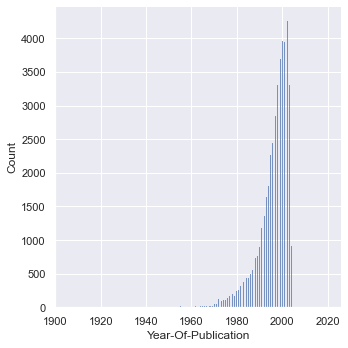

In [64]:
sns.displot(books['Year-Of-Publication']).set(xlim=(1900, 2026))